## Libraries

In [3]:
import xdmod.datawarehouse as xdw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xdmod.visualizer as v

## Sorting Functions for Display

In [4]:
def by_median(df):
    array = df.to_numpy()
    return np.nanmedian(array)

def by_mean(df):
    array = df.to_numpy()
    return np.nanmean(array)

## Configuration

In [5]:
host = "https://metrics-dev.ccr.buffalo.edu:9004"
startdate = "2022-06-16"
enddate = "2022-06-30"

## Retrieve Sorted Data

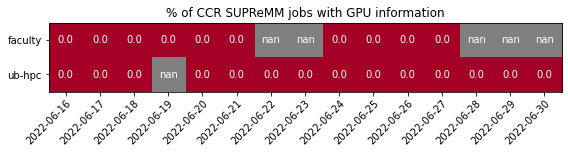

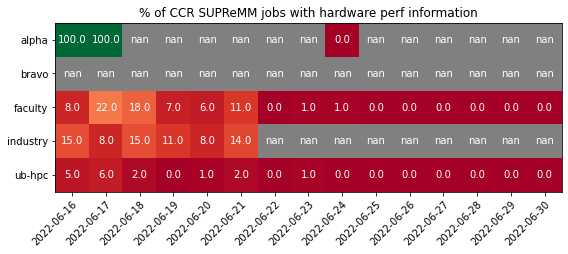

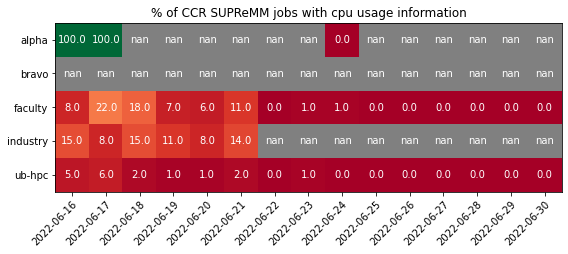

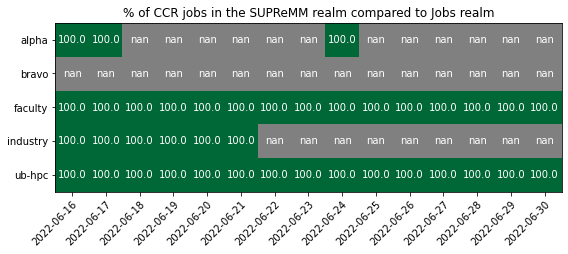

In [7]:
resources = []

for type in ['gpu', 'hardware', 'cpu', 'realms']:
    config = {"start": startdate, "end": enddate, "type": type}                
    with xdw.DataWareHouse(host) as test:
        data = test.get_qualitydata(config)
        resources.append(data)
        
resources.sort(key=by_median)
for res in resources:
    #print(res.loc['faculty'])
    v.quality_heatmap(res)

## Isolating reports for alerts

Should send alerts if:
1. Average % of jobs at week n drops over 10 since week n-1
2. If a resource that was present is no longer present 

In [8]:
from datetime import date
import datetime
today = date.today()
last_week = today - datetime.timedelta(days=7)
last_week

datetime.date(2022, 7, 13)

In [9]:
import requests
import pycurl
import sys
import getopt
import json
from datetime import date
import datetime

import xdmod.datawarehouse as xdw
                           
def main():
    
    today = date.today()
    sunday = today - datetime.timedelta(days=1)
    last_monday = today - datetime.timedelta(days=7)
    last_sunday = sunday - datetime.timedelta(days=1)
    lastlast_monday = last_monday - datetime.timedelta(days=7)
    
    host = "https://metrics-dev.ccr.buffalo.edu:9004"
    type_to_title = {'gpu': '% of CCR SUPReMM jobs with GPU information', 
                         'hardware': '% of CCR SUPReMM jobs with hardware perf information', 
                         'cpu': '% of CCR SUPReMM jobs with cpu usage information', 
                         'script': '% of CCR SUPReMM jobs with Job Batch Script information', 
                         'realms': '% of CCR jobs in the SUPReMM realm compared to Jobs realm'}
    
    alerts = []
    
    payload = {"blocks": [{"type": "section","text": {"type": "mrkdwn","text": "*SUPReMM Quality Alerts*"}}]}
    
    with xdw.DataWareHouse(host) as warehouse:
        for type in ['gpu', 'hardware', 'cpu', 'realms']:
            today_data = warehouse.get_qualitydata({"start": last_monday.strftime("%Y-%m-%d"), "end": sunday.strftime("%Y-%m-%d"), "type": type})
            lastweek_data = warehouse.get_qualitydata({"start": lastlast_monday.strftime("%Y-%m-%d"), "end": last_sunday.strftime("%Y-%m-%d"), "type": type})
            for res in today_data.index:
                #print(lastweek_data.mean(axis='columns')[res] - today_data.mean(axis='columns')[res])
                if lastweek_data.mean(axis='columns')[res] + today_data.mean(axis='columns')[res] >= 10: # change to minus
                    alert = today_data.loc[res]
                    payload['blocks'].append({"type": "section","text": {"type": "mrkdwn","text": f'Attention needed at: *{type_to_title[type]}* from the {alert.name} resource'}})
    #payload = {'text': 'hi'}
    
    response = requests.post('', 
                             data = json.dumps(payload))
    print(response.text)
    
    for i in alerts:
        print(i.name)
        print(i['2022-07-12'])
    
    
    
main()

ok


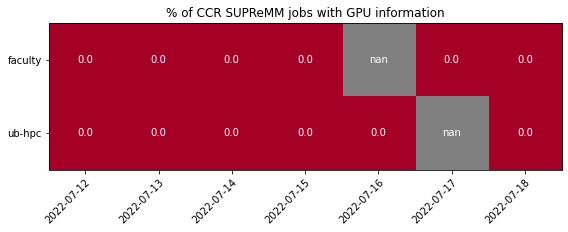

In [70]:
today = date.today()
sunday = today - datetime.timedelta(days=1)
last_monday = today - datetime.timedelta(days=7)
last_sunday = sunday - datetime.timedelta(days=1)
lastlast_monday = last_monday - datetime.timedelta(days=7)

host = "https://metrics-dev.ccr.buffalo.edu:9004"

with xdw.DataWareHouse(host) as warehouse:
    today_data = warehouse.get_qualitydata({"start": last_monday.strftime("%Y-%m-%d"), "end": sunday.strftime("%Y-%m-%d"), "type": 'gpu'})

    v.quality_heatmap(today_data)

False

{'TERM_PROGRAM': 'Apple_Terminal',
 'SHELL': '/bin/bash',
 'TERM': 'xterm-color',
 'TMPDIR': '/var/folders/qc/6bk8jy_55f731bhgzvw3sd880000gn/T/',
 'CONDA_SHLVL': '1',
 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.DMnsHX4ZCj/Render',
 'CONDA_PROMPT_MODIFIER': '(base) ',
 'TERM_PROGRAM_VERSION': '421.2',
 'OPAM_SWITCH_PREFIX': '/Users/test/.opam/default',
 'TERM_SESSION_ID': '139DC1C7-0B4A-4348-964D-66993911B478',
 'USER': 'test',
 'CONDA_EXE': '/Users/test/opt/anaconda3/bin/conda',
 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.AZDioli4OB/Listeners',
 '_CE_CONDA': '',
 'PATH': '/Users/test/.opam/default/bin:/Library/Frameworks/Python.framework/Versions/3.10/bin:/Users/test/opt/anaconda3/bin:/Users/test/opt/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin',
 'CONDA_PREFIX': '/Users/test/opt/anaconda3',
 'PWD': '/Users/test',
 'LANG': 'en_US.UTF-8',
 'XPC_FLAGS': '0x0',
 '_CE_M': '',
 'XPC_SERVICE_NAME': '0',
 'SHLVL': '1',
 'HOME': '/Users/

{"ok":false,"error":"invalid_arg_name"}
